# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import datetime

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
output_dir = output_data_file.split('/')

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = [] #?? get country code from citipy? 

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#create url
units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_keys.api_key}&q={city}&units={units}"

In [4]:
#loop thru all cities
#check if city can be found in openweathermap
#if found, add city to bucket set
#if not found, skip and continue

city = []       #response["name"]
cloudiness = [] #response["clouds"]["all"]
country = []    #response["sys"]["country"]
date = []       #response["dt"]
humidity = []   #response["main"]["humidity"]
lat = []        #response["coord"]["lat"]
lng = []        #response["coord"]["lon"]
max_temp = []   #response["main"]["temp_max"]
wind_speed = [] #response["wind"]["speed"]
sleep_interval = 55
basket_counter = 1
city_counter = 0
city_not_found = []

newline = '\n'
first_line = "Beginning Data Retrieval"
last_line = "Data Retrieval Complete"
just_line = "-------------------------------------"
not_found = "City not found... Skipping"
print(first_line)
print(just_line)
output_log = os.path.join(output_dir[0], "output_log.txt")
with open(output_log, 'w', newline='') as logfile:
    logfile.write(first_line + newline)
    logfile.write(just_line + newline)

    for x in range(len(cities)):
        query_url = f"{url}appid={api_keys.api_key}&q={cities[x]}&units={units}"
        response = requests.get(query_url).json()

        try:
            city.append(response["name"])

            try:
                country.append(response["sys"]["country"])
                date.append(response["dt"])
                humidity.append(response["main"]["humidity"])
                lat.append(response["coord"]["lat"])
                lng.append(response["coord"]["lon"])
                max_temp.append(response["main"]["temp_max"])
                wind_speed.append(response["wind"]["speed"])
                cloudiness.append(response["clouds"]["all"])

                city_counter += 1
                process_msg = f"Processing Record {city_counter} of Set {basket_counter} | {cities[x]}"
                print(process_msg)
                logfile.write(process_msg + newline)
                
                if (len(city) % 50) == 0:
                    basket_counter += 1
                    city_counter = 0
                    time.sleep(sleep_interval)

            except:
                process_msg = "Other error."
                print(process_msg)
                logfile.write(process_msg + newline)
                pass

        except:
            process_msg = f"{not_found} {cities[x]}"
            print(process_msg)
            logfile.write(process_msg + newline)
            city_not_found.append(cities[x])
            pass

    logfile.write(just_line + newline)
    logfile.write(last_line + newline)
    logfile.write(just_line + newline)


Beginning Data Retrieval
-------------------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | diu
Processing Record 3 of Set 1 | komsomolskiy
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | sao filipe
Processing Record 7 of Set 1 | oksfjord
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | olafsvik
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | grindavik
Processing Record 13 of Set 1 | kargopol
Processing Record 14 of Set 1 | kijang
Processing Record 15 of Set 1 | lorengau
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | tuktoyaktuk
Processing Record 18 of Set 1 | kalamata
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | laguna
Processing Record 21 of Set 1 | ha tinh
Processing Record 22 of Set 1 | owando
Processing Record 23 of Set 1 | atuona
City

Processing Record 37 of Set 4 | beringovskiy
City not found... Skipping vaitupu
City not found... Skipping kuche
Processing Record 38 of Set 4 | koppang
Processing Record 39 of Set 4 | bathsheba
Processing Record 40 of Set 4 | bilibino
Processing Record 41 of Set 4 | puerto ayora
Processing Record 42 of Set 4 | prince albert
Processing Record 43 of Set 4 | ericeira
Processing Record 44 of Set 4 | jupiter
Processing Record 45 of Set 4 | longyearbyen
Processing Record 46 of Set 4 | chimbote
City not found... Skipping safaqis
Processing Record 47 of Set 4 | bubaque
Processing Record 48 of Set 4 | amuntai
Processing Record 49 of Set 4 | mehamn
Processing Record 50 of Set 4 | nuevo laredo
Processing Record 1 of Set 5 | kahului
Processing Record 2 of Set 5 | kaitangata
Processing Record 3 of Set 5 | fort nelson
Processing Record 4 of Set 5 | plettenberg bay
Processing Record 5 of Set 5 | mayor pablo lagerenza
City not found... Skipping solovetskiy
Processing Record 6 of Set 5 | pyay
Processi

Processing Record 24 of Set 8 | khasan
Processing Record 25 of Set 8 | vila
Processing Record 26 of Set 8 | terre haute
Processing Record 27 of Set 8 | pattoki
Processing Record 28 of Set 8 | flinders
City not found... Skipping burica
Processing Record 29 of Set 8 | fare
Processing Record 30 of Set 8 | biltine
Processing Record 31 of Set 8 | the pas
Processing Record 32 of Set 8 | hasaki
City not found... Skipping vsevolodo-vilva
Processing Record 33 of Set 8 | hazorasp
Processing Record 34 of Set 8 | sola
Processing Record 35 of Set 8 | sao gabriel da cachoeira
Processing Record 36 of Set 8 | kyra
City not found... Skipping amderma
Processing Record 37 of Set 8 | tesanj
Processing Record 38 of Set 8 | avera
Processing Record 39 of Set 8 | sabha
Processing Record 40 of Set 8 | coacoatzintla
Processing Record 41 of Set 8 | mackay
City not found... Skipping subaytilah
Processing Record 42 of Set 8 | tilichiki
Processing Record 43 of Set 8 | ixtapa
Processing Record 44 of Set 8 | camabate

In [5]:
### Convert Raw Data to DataFrame
#* Export the city data into a .csv.
#* Display the DataFrame

In [6]:
city_df = pd.DataFrame({"City" : city,
                       "Cloudiness" : cloudiness,
                       "Country" : country,
                       "Date" : date,
                       "Humidity" : humidity,
                       "Lat" : lat,
                       "Lng" : lng,
                       "Max Temp" : max_temp,
                       "Wind Speed" : wind_speed})

city_df.count()

City          553
Cloudiness    553
Country       553
Date          553
Humidity      553
Lat           553
Lng           553
Max Temp      553
Wind Speed    553
dtype: int64

In [7]:
#export to csv file
output_file = os.path.join(output_dir[0], output_dir[1])
city_df.to_csv(output_file, index=False)

In [8]:
city_df

City  Cloudiness Country        Date  Humidity    Lat  \
0                Albany          97      US  1604283001        76  42.60   
1                   Diu           0      IN  1604283066        42  20.71   
2       Yangi Marg`ilon         100      UZ  1604282339        38  40.43   
3               Ushuaia          75      AR  1604283067        54 -54.80   
4              Thompson          75      CA  1604282405       100  55.74   
..                  ...         ...     ...         ...       ...    ...   
548  Comodoro Rivadavia           0      AR  1604283671        63 -45.87   
549             Jackson           1      US  1604283636        34  42.42   
550            Meulaboh         100      ID  1604283726        86   4.14   
551              Camopi          29      GF  1604283727        93   3.17   
552            Kargasok          97      RU  1604283727        98  59.06   

        Lng  Max Temp  Wind Speed  
0    -73.97     41.00        8.46  
1     70.98     76.32       11.27  
2     71.72     41.00        4.70  
3    -68.30     57.20        3.36  
4    -97.86     21.20        3.36  
..      ...       ...         ...  
548  -67.50     66.20        4.14  
549 -122.83     66.20        4.70  
550   96.13     78.84        4.43  
551  -52.32     74.14        2.21  
552   80.86     29.50       10.25  

[553 rows x 9 columns]

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

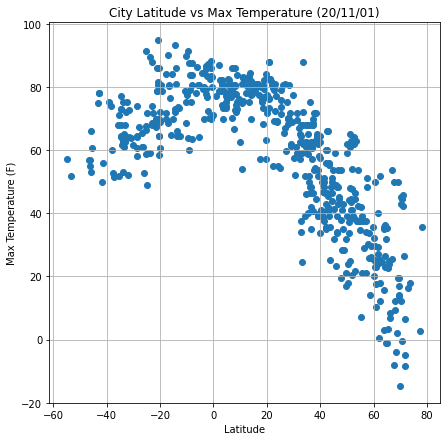

In [9]:
# create a scatter plot latitude v temperature
from datetime import datetime
dt = int(date[0])
plot_date = datetime.fromtimestamp(dt).strftime('%y/%m/%d')
x_values = city_df['Lat']
y_values = city_df['Max Temp']
fig, ax = plt.subplots(figsize=(7,7))
ax.set_autoscale_on(True)
ax.scatter(x_values, y_values)
plt.title(f"City Latitude vs Max Temperature ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
#plt.show()
file = os.path.join("images", "lat_temp.png")
plt.savefig(file)


#### Latitude vs. Humidity Plot

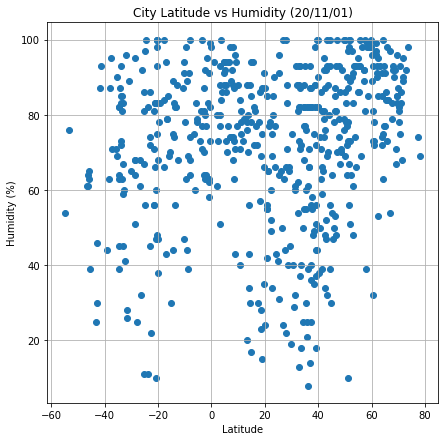

In [10]:
y_hum = city_df["Humidity"]
x_lat = city_df["Lat"]
fig, ax1 = plt.subplots(figsize=(7,7))
ax1.set_autoscale_on(True)
ax1.scatter(x_lat, y_hum)
plt.title(f"City Latitude vs Humidity ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
#plt.show()
file = os.path.join("images", "lat_humid.png")
plt.savefig(file)

#### Latitude vs. Cloudiness Plot

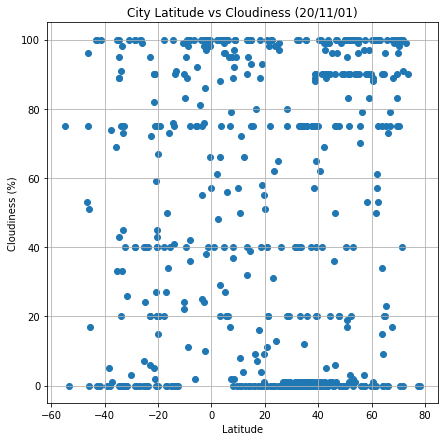

In [11]:
y_cloud = city_df["Cloudiness"]
fig, ax2 = plt.subplots(figsize=(7,7))
ax2.set_autoscale_on(True)
ax2.scatter(x_lat, y_cloud)
plt.title(f"City Latitude vs Cloudiness ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
#plt.show()
file = os.path.join("images", "lat_cloud.png")
plt.savefig(file)

#### Latitude vs. Wind Speed Plot

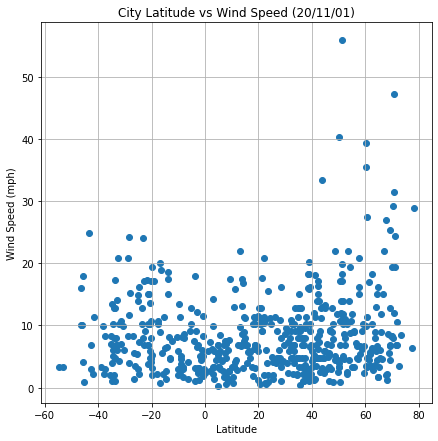

In [12]:
y_wind = city_df["Wind Speed"]
fig, ax3 = plt.subplots(figsize=(7,7))
ax3.set_autoscale_on(True)
ax3.scatter(x_lat, y_wind)
plt.title(f"City Latitude vs Wind Speed ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
#plt.show()
file = os.path.join("images", "lat_wind.png")
plt.savefig(file)